In [9]:
import phd_ms
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#Change this line to the directory where inputs are stored
IN_DIR = '/home/pbeamer/Documents/graphst/'

DATASET = 'visium_hne_graphst'
emb = 'X_gst'
INPUT_FILE= IN_DIR+DATASET
GROUND_TRUTH=None
#Set the scale parameters we want to use, and keys to save
RESOLUTIONS = np.linspace(start=0.15,stop=.95,num=8)
RES_KEYS = ['leiden_'+str(r) for r in RESOLUTIONS]

In [11]:

#Run clusterings for each resolution and save
'''
Preprocess leiden clusterings for given dataset

Arguments: 
input_file: path to the input file
output_file: is the path where the output will be saved
embedding: anndata field of the embedding to use
resolutions: Resolution parameters
keys = Keys to save clusters in adata.obs
ground_truth: The ground truth field in adata.obs

Output: adata with clusters in adata.obs[keys[i]] for each resolution i
'''
phd_ms.tl.preprocess_leiden(INPUT_FILE,output_file=INPUT_FILE,emb='X_gst',resolution=RESOLUTIONS,res_keys=RES_KEYS,ground_truth=GROUND_TRUTH)

#read the adata file
adata = sc.read_h5ad(INPUT_FILE+'.h5ad')

In [12]:
'''
Build cluster filtration

Arguments: 
input_file: path to the input file
output_file: is the path where the output will be saved
embedding: anndata field of the embedding to use
resolutions: Resolution parameters
keys = Keys to save clusters in adata.obs
ground_truth: The ground truth field in adata.obs

Output: adata with clusters in adata.obs[keys[i]] for each resolution i
'''
cluster_complex,clusterings= phd_ms.tl.cluster_filtration(adata,res_keys=RES_KEYS,index='containment',order=range(len(RES_KEYS)),)


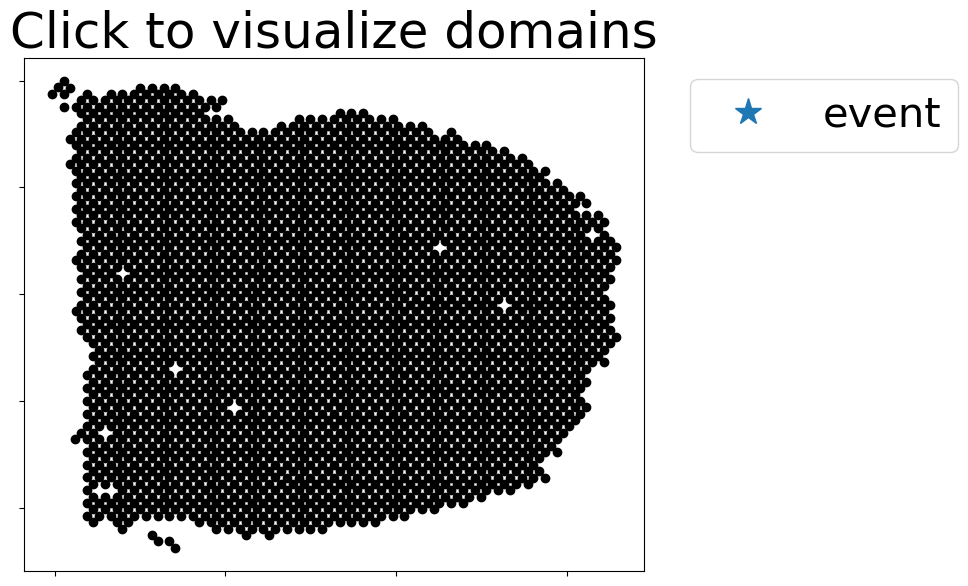

IndexError: index -1 is out of bounds for axis 0 with size 0

In [13]:
'''
Generate and map multiscale domains

Arguments:
spatial: spatial coordinates of points
cluster_complex: gudhi simplex tree of cluster filtration
clusterings: list of clusters at each resolution, containing cell indices
num_domains: number of multiscale domains to map, if 0 then all domains
filt: filter out persistent clusters with persistence less than this value
order: order of the output,'size' or default 'persistence'
redundant_filter: filter out domains which are to similar to previously examined domains, default is False
plots: 'on' to plot the domains

Output:
list of multiscale domains, consisting of coreness score for each point
'''
phd_ms.tl.point_click_multiscale(adata.obsm['spatial'],cluster_complex,clusterings)